
 <center><h1 style="color:red">Don't forget to upvote if you like it! :)</h1></center>

 # **<h1 style="color:black">Titanic</h1>**

  ![](https://wallpapercave.com/wp/7wF5gkJ.jpg)
   ## Introduction  
   
In this notebook we examine the Titanic dataset and then we build a model that can predict if a passenger survived the sinking or not. We start with finding feature types, missing values and we continue with feature analysis and visualization of the data. Feature engineering is implemented to create new attributes, encoding and imputation of the missing values. At last we test several classifiers and we evaluate them with the help of the ROC and CAP curves.

## History

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.         
  

# Contents 
1. Include Libraries
2. Import DataSet
3. Handle Missing Value
4. EDA(Exploratory Data Analysis)
5. Feature Engineering

Machine learning Model
6. Logistic Regression
7. Random Forest Classifier
8. ROC Curve
9. Final Submittion

### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline                 

import pandas as pd                # Implemennts milti-dimensional array and matrices
import numpy as np                 # For data manipulation and analysis
import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
# load dataset
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission=pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
len(train),len(test),len(gender_submission)

(891, 418, 418)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Karaic, Mr. Milan",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Some Observations:
* There are a total of 891 passengers in our training set.
* The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
* The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
* The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Variables
From the data overview of the competition, we have a description of each variable:
* PassengerId - unique identifier
* Survived:
        0 = No
        1 = Yes
* Pclass: Ticket class
        1 = 1st, Upper
        2 = 2nd, Middle
        3 = 3rd, Lower
* Name: full name with a title
* Sex: gender
* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp: Number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: Number of parents / children aboard the Titanic. The dataset defines family relations in this way:
        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number.
* Fare: Passenger fare.
* Cabin: Cabin number.
* Embarked: Port of Embarkation:
        C = Cherbourg
        Q = Queenstown
        S = Southampton

# Handle missing data
![](https://miro.medium.com/max/763/0*02gRztuKsDyEFQBB)

Checking Missing value is **present or not** in our dataset

In [8]:
train.isnull().values.any()

True

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

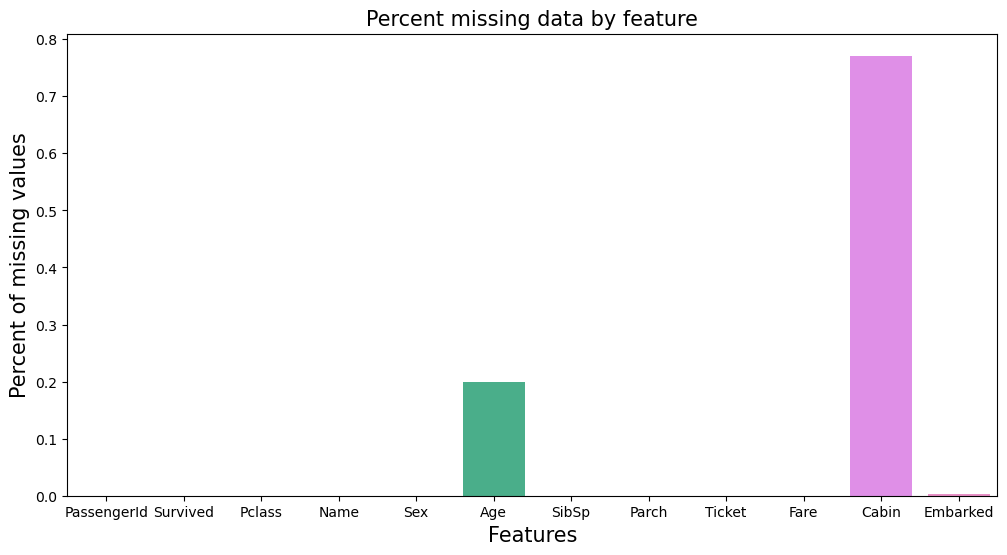

In [11]:
plt.style.use('default')
total=train.isnull().sum()
percent=train.isnull().sum()/train.isnull().count()
missing_data=pd.concat([total,percent],axis=1, keys=['total', 'percent'])
#missing_data.sort_values(ascending=False)
ax = plt.subplots(figsize=(12, 6))
#plt.xticks(rotation='90')
sns.barplot(x=missing_data.index,y=missing_data['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

**Missingno** library offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.

In [12]:
import missingno as msno

## Bar Chart :
This bar chart gives you an idea about how many missing values are there in each column.

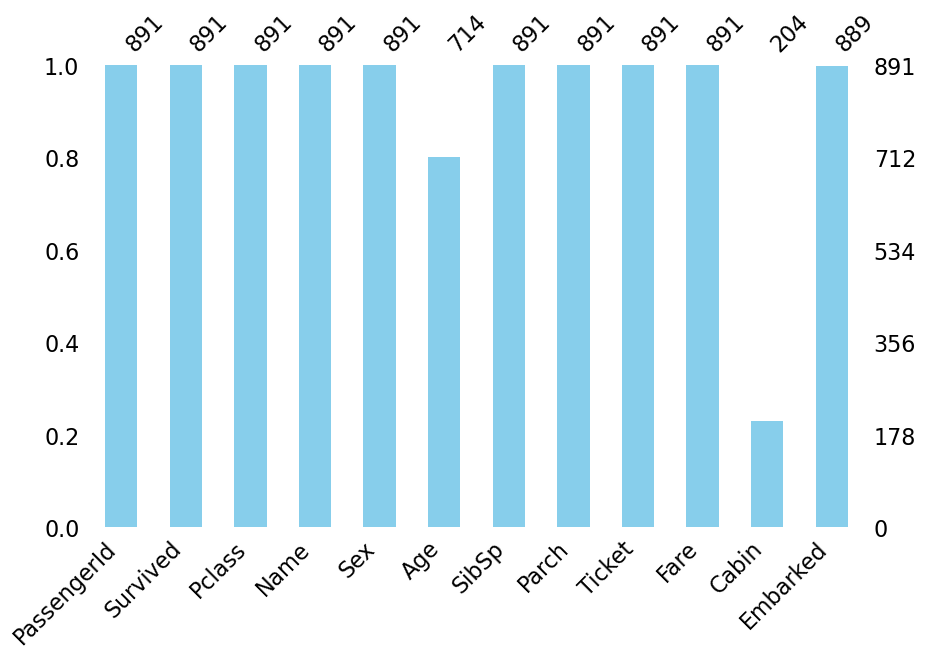

In [13]:
msno.bar(train,figsize=(10,6),color="skyblue")
plt.show()

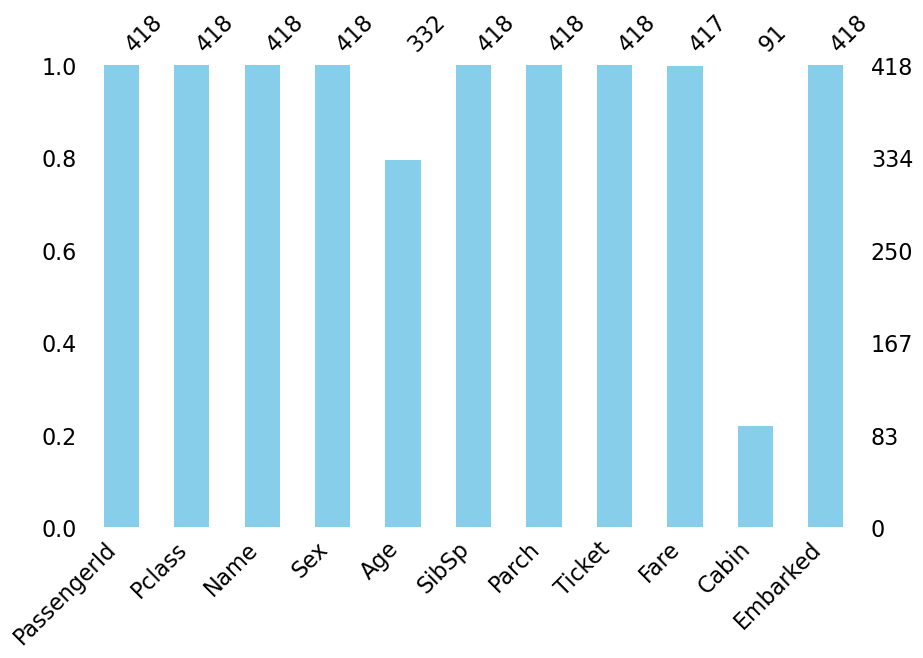

In [14]:
msno.bar(test,figsize=(10,6),color="skyblue")
plt.show()

## Heatmap
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

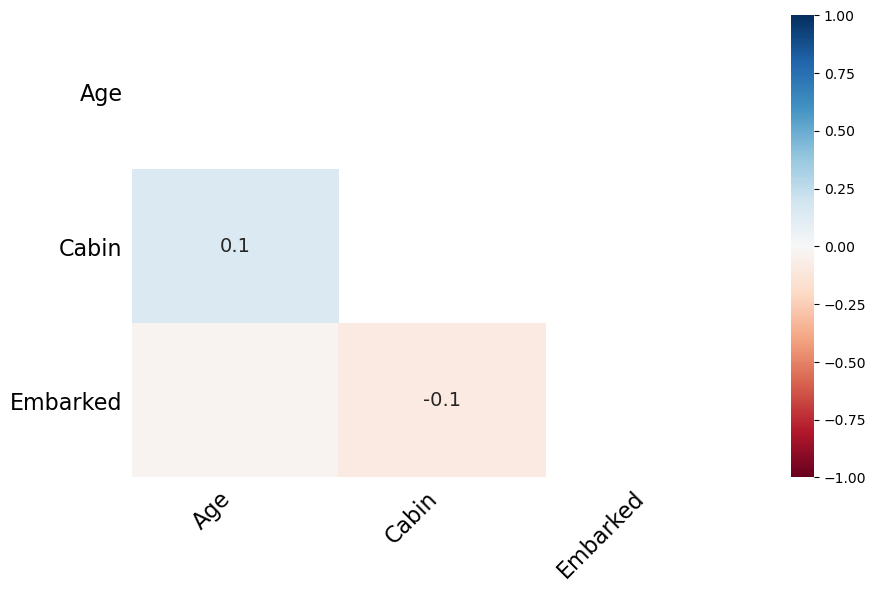

In [15]:
msno.heatmap(train,figsize=(10,6))
plt.show()

## Matrix:
Visualising missing values for a sample of 150 Using this matrix you can very quickly find the pattern of missingness in the dataset.

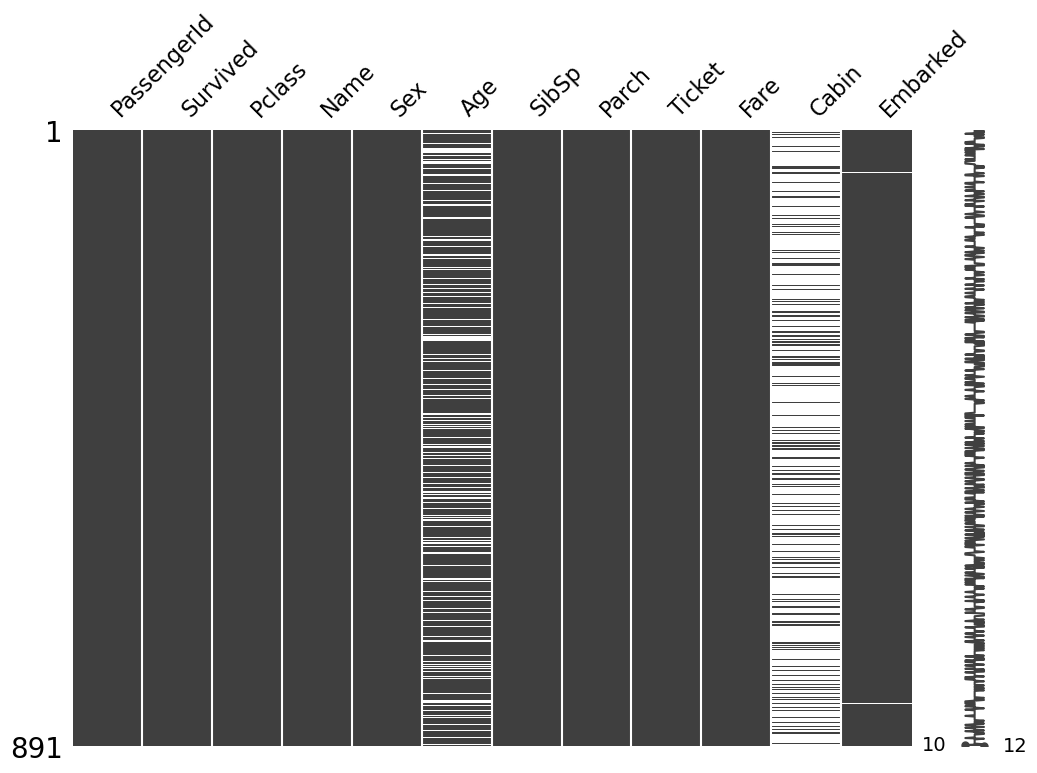

In [16]:
msno.matrix(train,figsize=(12,8))
plt.show()

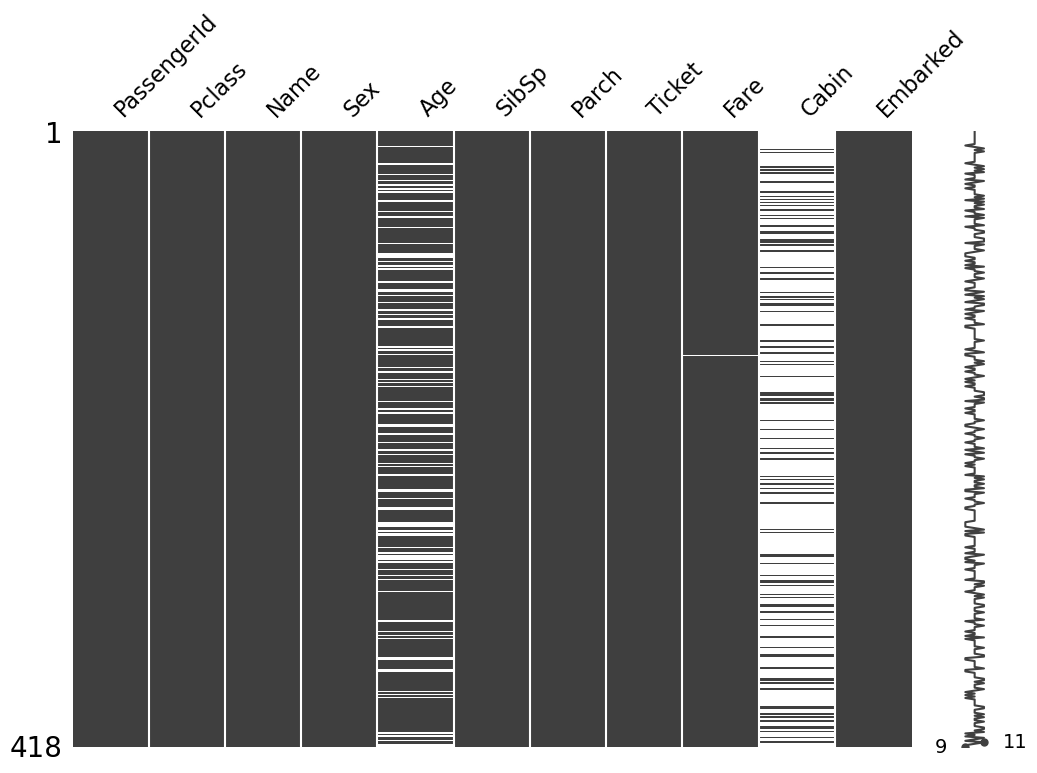

In [17]:
msno.matrix(test,figsize=(12,8))
plt.show()

# Replacing With Mean/Median/mode
MEAN: Suitable for continuous data without outliers
MEDIAN : Suitable for continuous data with outliers
Mode: For categorical feature we can select to fill in the missing values with the most common value(mode) as illustrated below.

* We are going to deal missing value(in **Age**) has numeric data by replace its **median value**

In [18]:
train['Age'].fillna(train['Age'].median(),inplace=True)
test['Age'].fillna(train['Age'].median(),inplace=True)

In [19]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

* We are going to deal missing value(in **Cabin** & **Embarked**) has categorical data by replace its by new category ie. 'unknown'

In [20]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
train['Cabin'].fillna('Unknown',inplace=True)
train['Embarked'].fillna('Unknown',inplace=True)
test['Cabin'].fillna('Unknown',inplace=True)
test['Fare'].fillna(train['Fare'].median(),inplace=True)

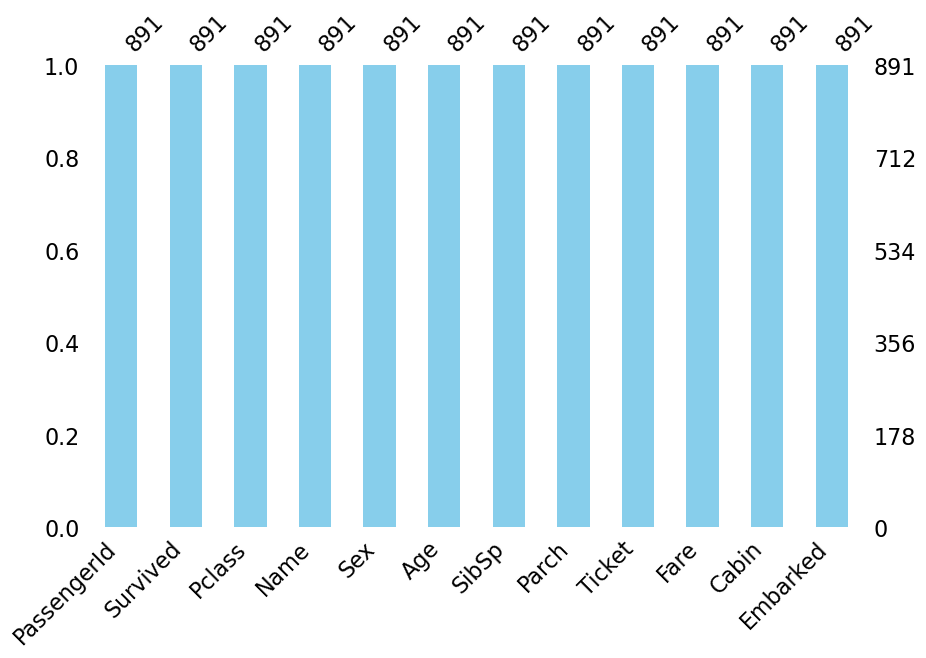

In [22]:
msno.bar(train,figsize=(10,6),color="skyblue")
plt.show()

As we see their is not any missing value

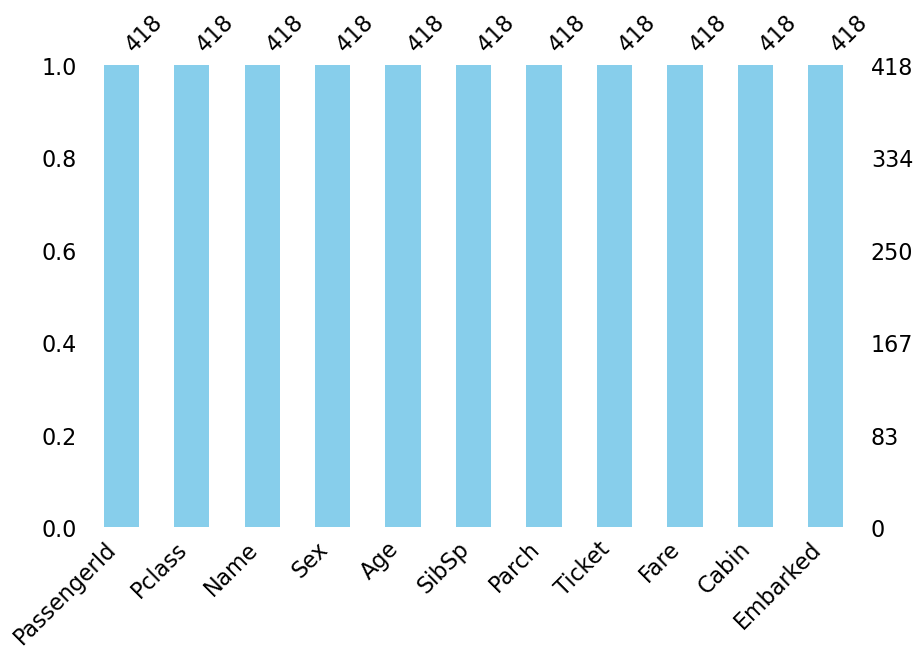

In [23]:
msno.bar(test,figsize=(10,6),color="skyblue")
plt.show()

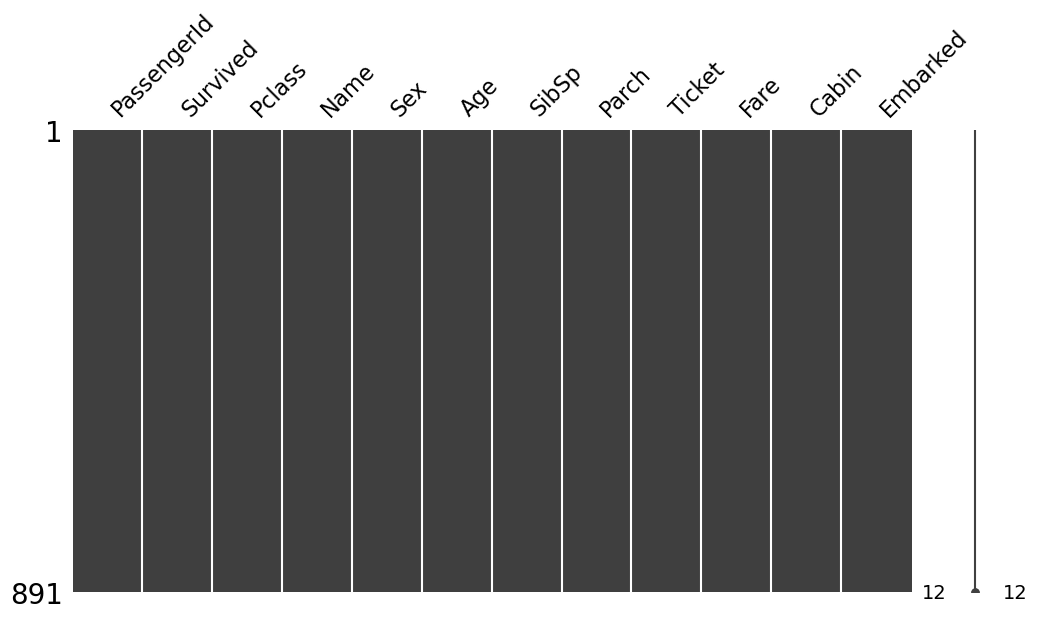

In [24]:
msno.matrix(train,figsize=(12,6))
plt.show()

# Exploratory data analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

## 1. Survivals( Survived (1) or died (0))

In [25]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

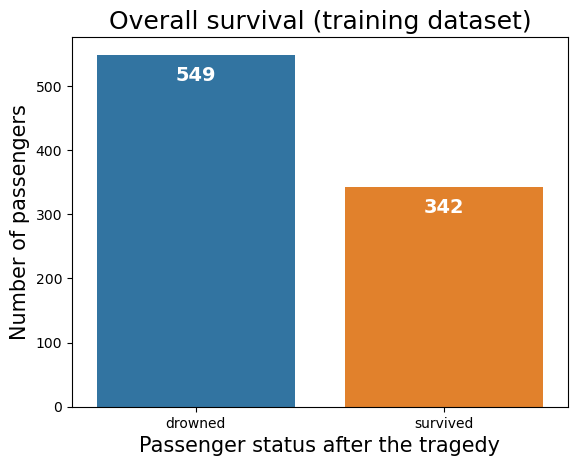

In [26]:

sns.countplot(x='Survived',data=train)
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 18)
# set x label
plt.xlabel('Passenger status after the tragedy',fontsize = 15)
# set y label
plt.ylabel('Number of passengers',fontsize = 15)
labels = (train['Survived'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()


* We have 891 passengers in train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived.
* more people died than survived (38% survived)








# 1.1 Sex 
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQNR1gaL8DqmzM9z_OTHHmng8P9ow3NDuLDcvA47Yv-ANlux3f8&usqp=CAU)

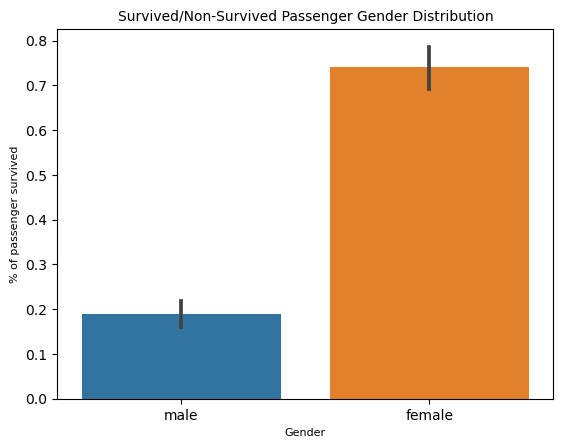

In [27]:

sns.barplot(x = "Sex", y = "Survived", data=train)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize =10)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 8)
plt.xlabel("Gender",fontsize = 8)
plt.show()


In [28]:
print("% of women survived: " , train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count())
print("% of men survived:   " , train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


* As predicted, females have a much higher chance of survival than males. 

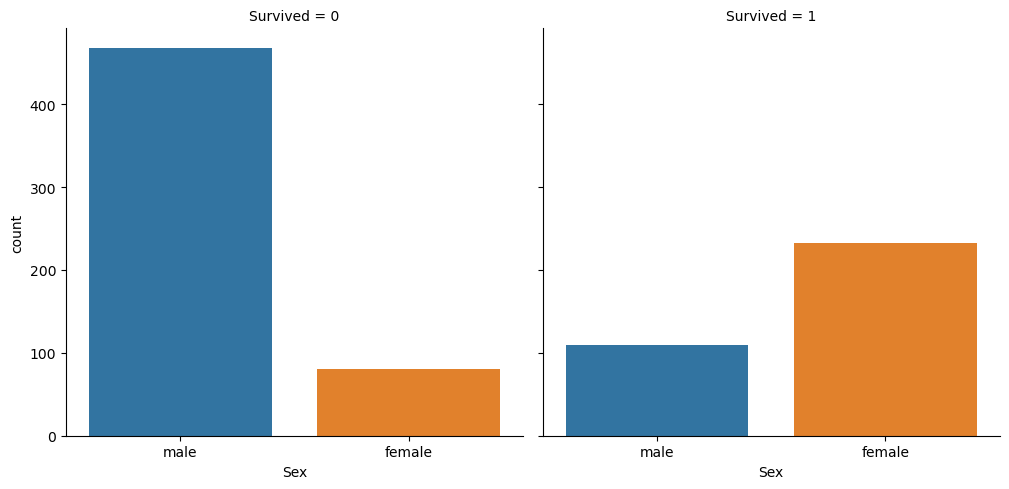

In [29]:

sns.catplot(x='Sex', col='Survived', kind='count', data=train)

plt.show()

In [30]:
train.groupby(['Survived','Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   81     81     81      81    81   
         male            468     468   468  468    468    468     468   468   
1        female          233     233   233  233    233    233     233   233   
         male            109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female     81        81  
         male      468       468  
1        female    233       233  
         male      109       109

# 1.2 Pclss(Passenger’s class )

In [31]:
train['Pclass'].unique()

array([3, 1, 2])

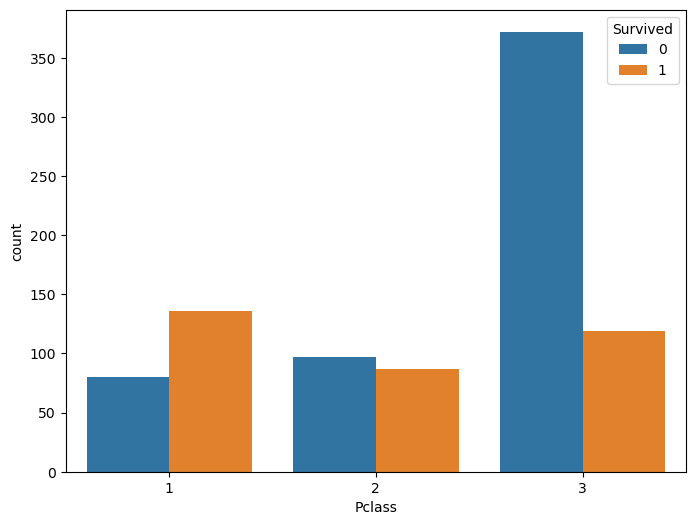

In [32]:

plt.subplots(figsize = (8,6))
sns.countplot('Pclass',hue='Survived',data=train)

plt.show()

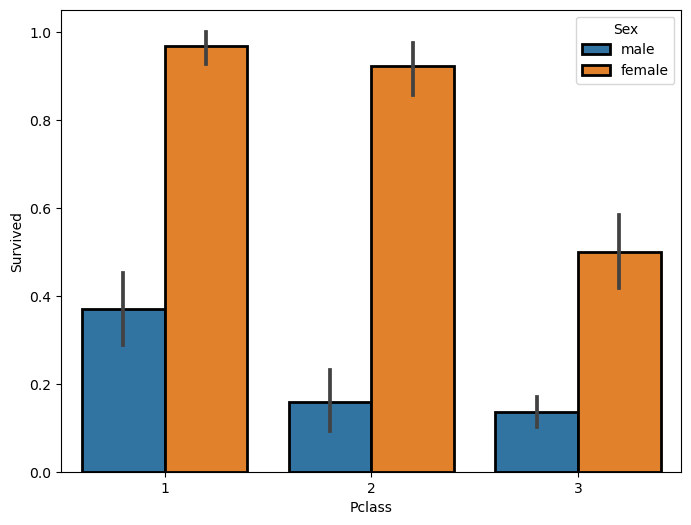

In [33]:
plt.subplots(figsize = (8,6))
sns.barplot('Pclass','Survived',data=train,hue='Sex',edgecolor=(0,0,0), linewidth=2)
plt.show()

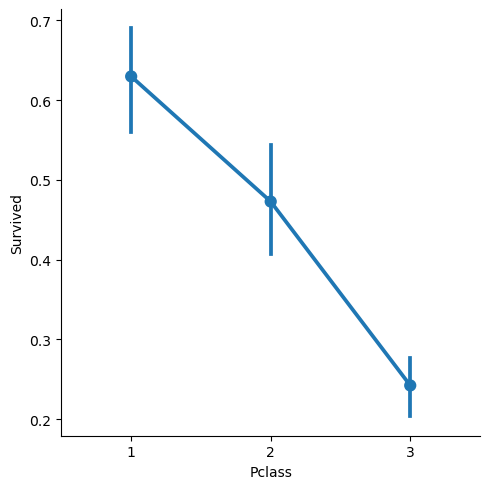

In [34]:
sns.catplot('Pclass','Survived', kind='point', data=train);

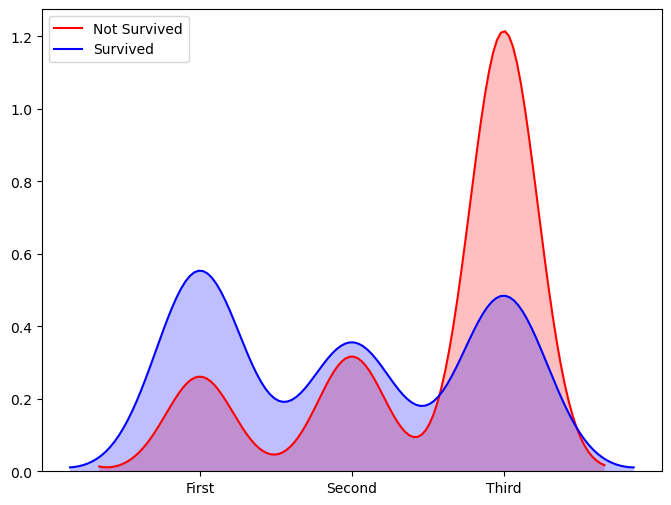

In [35]:
plt.subplots(figsize=(8,6))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)
plt.show()

In [36]:
print("% of survivals in") 
print("Pclass=1 : ", train.Survived[train.Pclass == 1].sum()/train.Survived[train.Pclass == 1].count())
print("Pclass=2 : ", train.Survived[train.Pclass == 2].sum()/train.Survived[train.Pclass == 2].count())
print("Pclass=3 : ", train.Survived[train.Pclass == 3].sum()/train[train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


So it clearly seems that,The survival of the people belong to 3rd class is very least. It looks like ...

* 63% first class passenger survived titanic tragedy, while
* 48% second class and
* only 24% third class passenger survived.

# 1.3 Age 
![](https://lesleylyle.com/wp-content/uploads/2017/03/Age-Democraphic.jpg)


### What was the age of passengers, how it correlated with chances to survive
We have 263 missing values:

* 177 missing in the training dataset(**which had filled by age mean value**)
* 86 in the test dataset
Overall age distribution (seaborn distplot) and descriptive statistics:

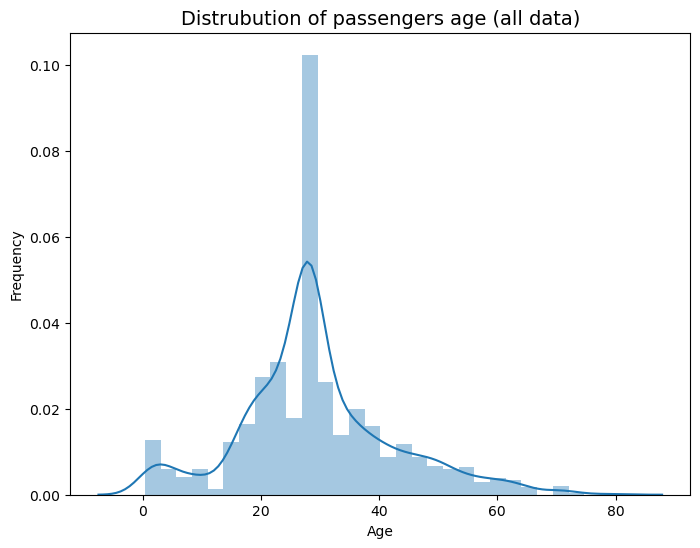

In [37]:
plt.subplots(figsize=(8,6))
sns.distplot(train.Age)
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

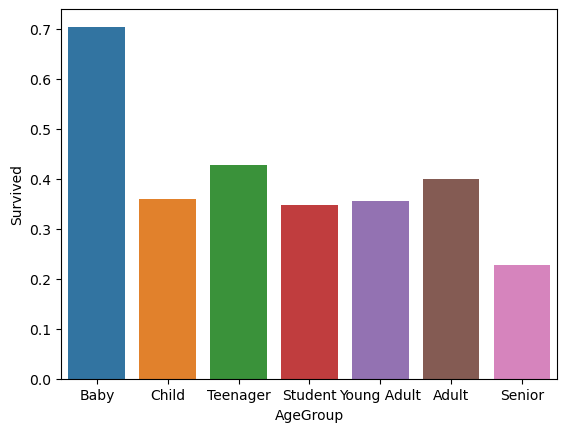

In [38]:
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train,ci=None)
plt.show()

*  Babies are more likely to survive than any other age group.

# 1.4 Name 

In [39]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Each passenger Name value contains the title of the passenger which we can extract and discover.
To create new variable "Title":

1. I am using method 'split' by comma to divide Name in two parts and save the second part
2. I am splitting saved part by dot and save first part of the result
3. To remove spaces around the title I am using 'split' method
To visualize, how many passengers hold each title, I chose countplot.

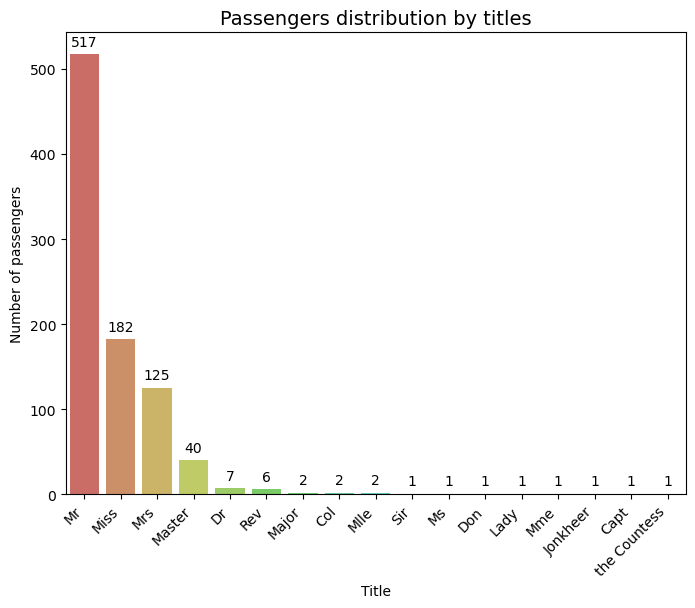

In [40]:
train['Title'] = train['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
test['Title'] = test['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
plt.figure(figsize=(8, 6))
ax = sns.countplot( x = 'Title', data = train, palette = "hls", order = train['Title'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (train['Title'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')

plt.show()

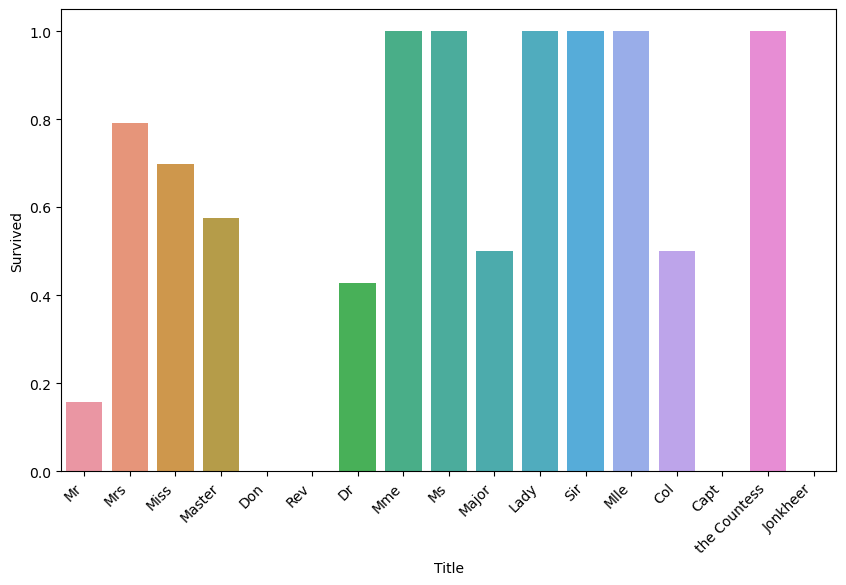

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Title", y="Survived", data=train,ci=None) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.show()

# 1.4 Cabin  
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

In [42]:
train['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [43]:
train['Cabin'].unique()


array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

* From the number of the cabin we can extract first letter, which will tell us about placement of the cabin on the ship!

* To the passengers without deck information I will imput U letter (as unknown).

In [44]:
train['deck']=train['Cabin'].str.split('',expand=True)[1]
test['deck']=test['Cabin'].str.split('',expand=True)[1]

In [45]:
train['deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

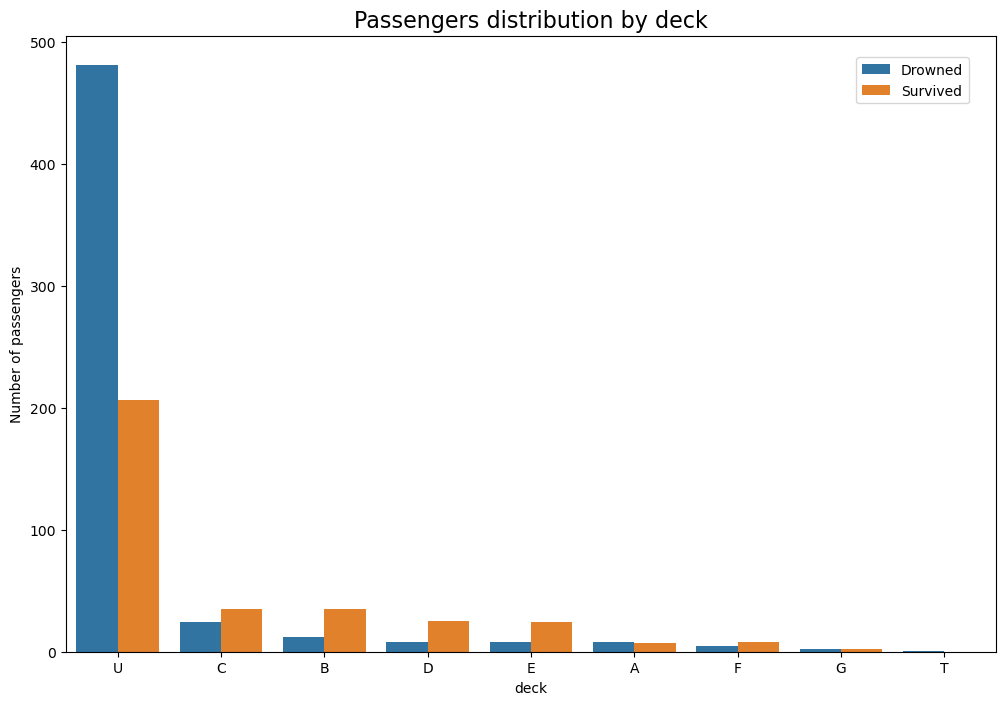

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x=train['deck'],data=train,hue='Survived',order = train['deck'].value_counts().index)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.xticks(rotation = False)


plt.show()

* Most passengers don't have cabin numbers ('U').
* The largest part of passengers with known cabin numbers were located on the 'C' deck . 'C' deck is fifth by a percentage of the survivor.
* The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'.

# 1.5 Parch( Number of Parents/Children Aboard )
![](https://i.pinimg.com/originals/e5/6d/6b/e56d6b2ca15caaf30d98da2c9a1ff081.jpg)

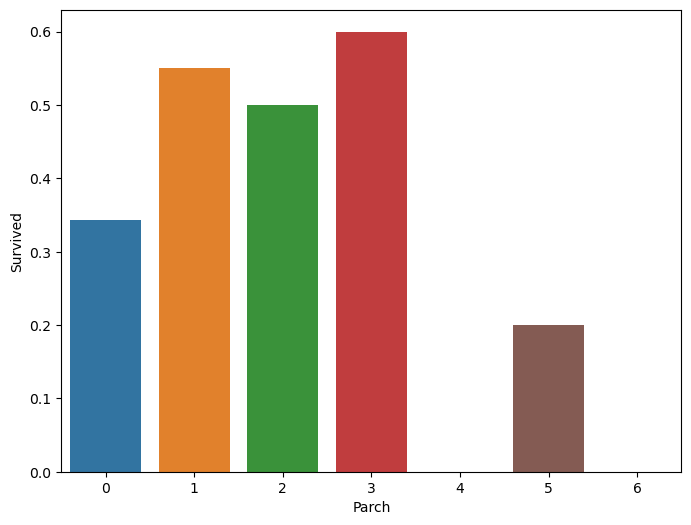

In [47]:
#draw a bar plot for Parch vs. survival
plt.figure(figsize=(8,6))
sns.barplot(x="Parch", y="Survived", data=train,ci=None)
plt.show()

* People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

# 1.6 SibSp( Number of Siblings/Spouses Aboard )

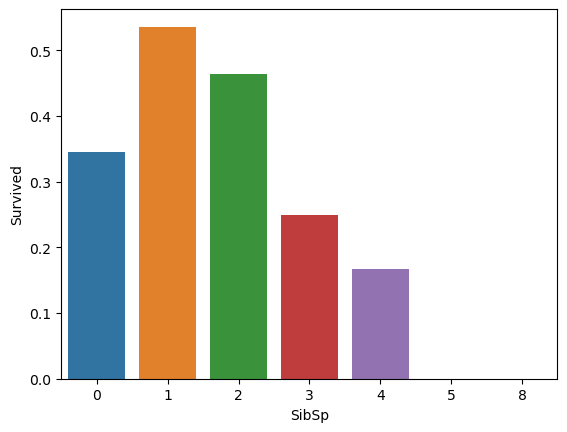

In [48]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train,ci=None)
plt.show()

In [49]:
train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8])

In [50]:
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 4 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


* In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

# 1.7 Fare( Passenger Fare )
![](https://qph.fs.quoracdn.net/main-qimg-5ab46f31803d2242e89996144a228ab1.webp)

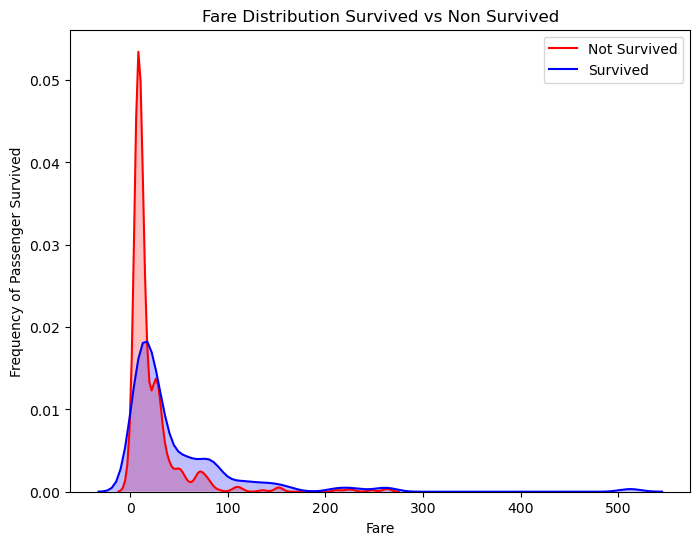

In [51]:
plt.subplots(figsize=(8,6))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived')
plt.ylabel('Frequency of Passenger Survived')
plt.xlabel('Fare')
plt.show()

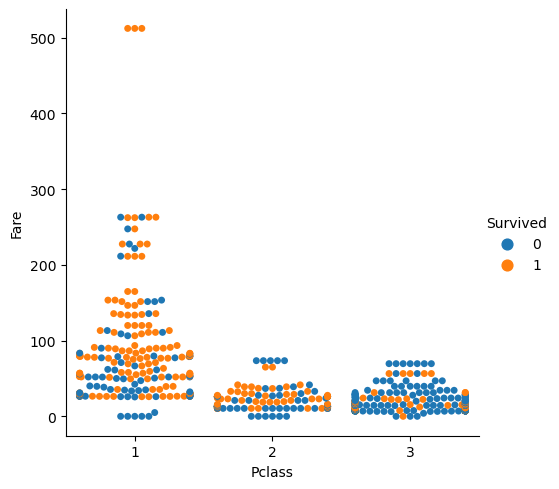

In [52]:
sns.catplot(x="Pclass", y="Fare",hue='Survived', kind="swarm", data=train)
plt.show()

* We can observe that the distribution of prices for the second and third class is very similar. 

* The distribution of first-class prices is very different, has a larger spread, and on average prices are higher.

Looks like the bigger passenger paid, the more chances to survive he had.

# 1.8 Embarked( Port of Embarkation )
![](https://hainguyenau.github.io/projects/img/titanic/route.JPG)
Titanic had 3 embarkation points before the ship started its route to New York:

* Southampton
* Cherbourg
* Queenstown

Some passengers could leave Titanic in Cherbourg or Queenstown and avoid catastrophe. Also, the point of embarkation could have an influence on ticket fare and location on the ship.

In [53]:
train['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [54]:
train['Embarked'].describe()

count     891
unique      4
top         S
freq      644
Name: Embarked, dtype: object

In [55]:
train['Embarked'] = train['Embarked'].replace('Unknown','S')

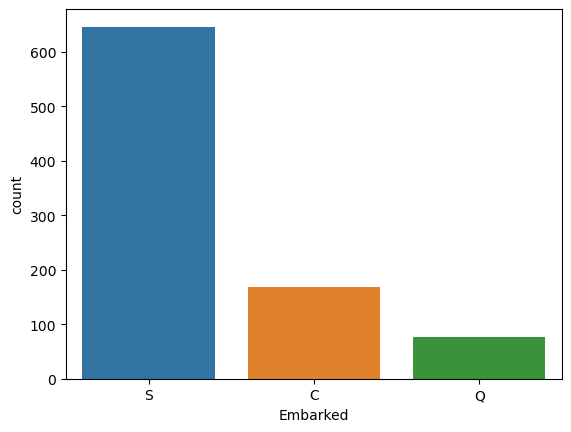

In [56]:
sns.countplot(train.Embarked)
labels = (train['Embarked'].value_counts())


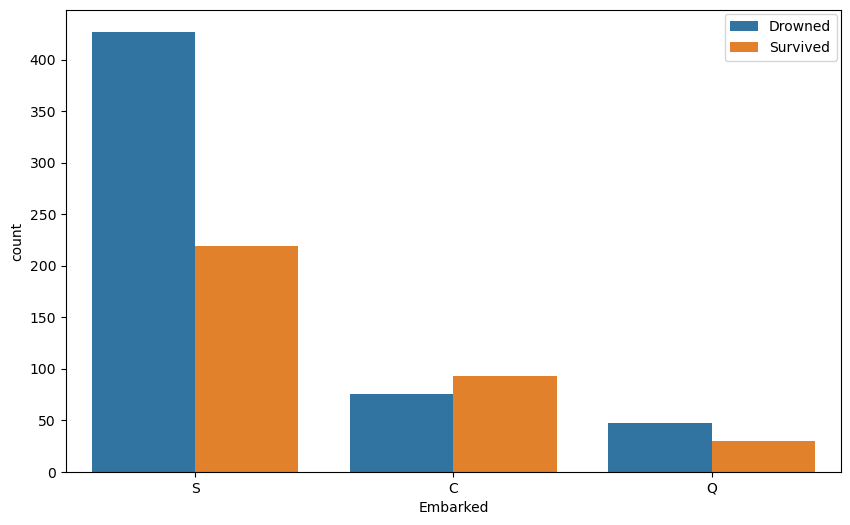

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(train['Embarked'],hue='Survived',data=train)
plt.legend(( 'Drowned', 'Survived'), loc=(0.85,0.89))
plt.show()

* Most number of passengers  were embarked in Southampton. Also Southampton has the biggiest proportion of drowned passengers.

* Passengers emarked in Cherbourg and more than 50% of them survived (in the training dataset).

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Student,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Young Adult,Mr,U


# 2. Feature Engineering
![](https://img-a.udemycdn.com/course/750x422/1304050_ee0f_8.jpg)

## 2.1 Creating Dummies Variables

Dummy variable is a categorical variable that has been transformed into numeric. For example the column Gender, we have "male" and "female" we will transform these variables into numeric. Creating a new column just for Men. and Women, where 1 will be set to positive and 0 to negative

In [59]:
total_data=train.append(test)

In [60]:
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Student,Mr,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult,Miss,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Young Adult,Mr,U


In [61]:
total_data.shape

(1309, 15)

In [62]:
total_data['Sex'] =total_data['Sex'].replace('male',0)
total_data['Sex'] =total_data['Sex'].replace('female',1)
total_data['Embarked'] =total_data['Embarked'].replace('S',0)
total_data['Embarked'] = total_data['Embarked'].replace('Q',1)
total_data['Embarked'] = total_data['Embarked'].replace('C',2)

## 2.2 Adding New Features and Filling the missing values

In [63]:
mapping = {'Mlle': 'Miss', 'Major': 'Rare', 'Col': 'Rare', 'Sir': 'Rare', 'Don': 'Rare', 'Mme': 'Mrs',
           'Jonkheer': 'Rare', 'Lady': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare', 'Ms': 'Miss', 'Dona': 'Mrs', 'Rev':'Rare', 'Dr':'Rare'}

total_data.replace({'Title': mapping}, inplace=True)

total_data['Title'].value_counts(normalize=True)*100

Mr              57.830405
Miss            20.168067
Mrs             15.202445
Master           4.660046
Rare             2.062643
the Countess     0.076394
Name: Title, dtype: float64

In [64]:
total_data['Title'] = total_data['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4})
total_data['Title'].fillna(total_data['Title'].median(),inplace=True)

In [65]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
total_data['deck'] = total_data['deck'].map(cabin_category)


In [66]:
total_data['Family_size'] = total_data['SibSp'] + total_data['Parch'] + 1


In [67]:
total_data['Alone'] = 1
total_data['Alone'].loc[total_data['Family_size'] > 1] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In this case I will use the age that was provided from our dataset to create the groups to find out if the passenger was a child, youth, adult, etc. In this case we are doing a Feacture Engineer where we transform a column to get another one through it

In [68]:
bins = [-1, 0, 18, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
total_data['AgeGroup'] = pd.cut(total_data["Age"], bins, labels = labels)
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
total_data['AgeGroup'] = total_data['AgeGroup'].map(age_mapping)

### Correlation

### Correlation is a statistical technique that can show whether and how strongly pairs of variables are related

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/600px-Correlation_examples2.svg.png)

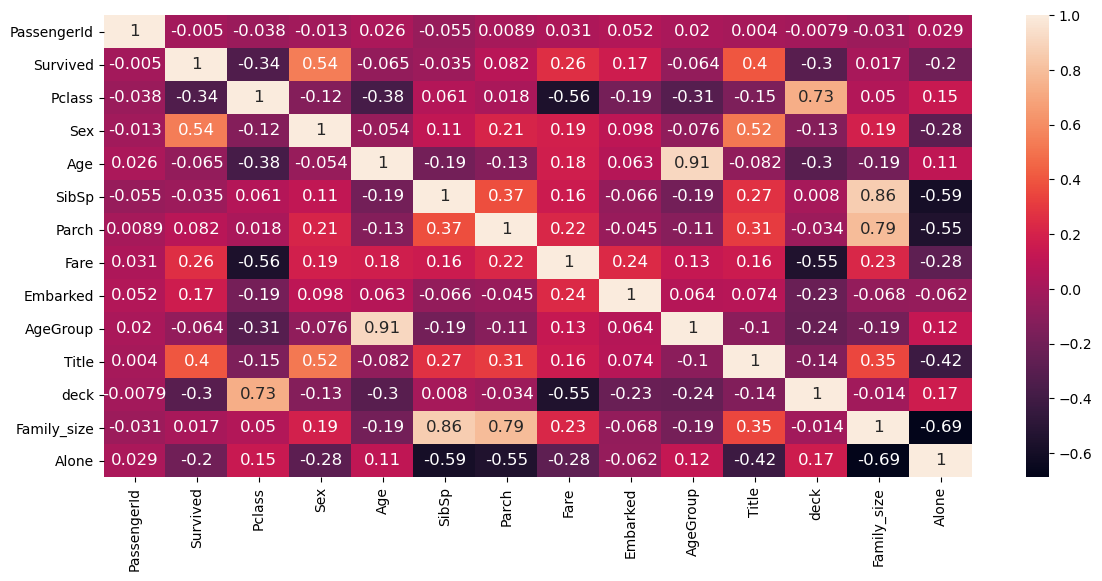

In [69]:
fig,ax=plt.subplots(figsize=(14,6))
sns.heatmap(total_data.corr(),annot=True,annot_kws={'size':12})

In [70]:
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,deck,Family_size,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,2.0,0.0,9,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,4.0,2.0,3,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,3.0,1.0,9,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3.0,2.0,3,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,3.0,0.0,9,1,1


In [71]:
total_data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
AgeGroup         0
Title            0
deck             0
Family_size      0
Alone            0
dtype: int64

## **Dateset is completely ready now!**

# 2.3 Feature selection

![](https://miro.medium.com/max/1002/1*68H8EsCwfqJNxzYdPYtEDw.png)

We will now select the features (X) for our model. These features will help our model identify patterns. The features will be columns.

"When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential."

In [72]:
features = ['Embarked','Fare','Pclass','Sex','Title','Family_size','Alone']

# **Building Machine Learning Models**

In [73]:
#Modelos
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Model Select
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [74]:
df_train = total_data[0:891]
df_test =  total_data[891:]
X = df_train[features]
y = df_train['Survived'].astype(int)


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=78941)

 Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

Random Forest:

In [76]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

Logistic Regression:

In [77]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)


K Nearest Neighbor:

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)


Gaussian Naive Bayes:

In [79]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

Linear Support Vector Machine:

In [80]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Decision Tree

In [81]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

## Which is the best Model ?

In [82]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              ' Support Vector Machine', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_linear_svc, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.54,Random Forest
93.54,Decision Tree
85.11,KNN
81.46,Naive Bayes
80.76,Logistic Regression
80.06,Support Vector Machine


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs & Logistic_Regression

## Logistic_Regression Model
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTOvSA2vtiTPKUjUl-yp5aNYlcAgrLz_2rX3camQuVYddefbxHE&usqp=CAU)
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

In [83]:
model= LogisticRegression(solver= 'lbfgs',max_iter=400)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


cm_logit = confusion_matrix(y_test, predictions)
print('Confusion matrix for Logistic\n',cm_logit)

accuracy_logit = accuracy_score(y_test,predictions)
precision_logit =precision_score(y_test, predictions)
recall_logit =  recall_score(y_test, predictions)
f1_logit = f1_score(y_test, predictions)
print('accuracy_logistic : %.3f' %accuracy_logit)
print('precision_logistic : %.3f' %precision_logit)
print('recall_logistic : %.3f' %recall_logit)
print('f1-score_logistic : %.3f' %f1_logit)
auc_logit = roc_auc_score(y_test,predictions)
print('AUC_logistic : %.2f' % auc_logit)

Confusion matrix for Logistic
 [[97 18]
 [22 42]]
accuracy_logistic : 0.777
precision_logistic : 0.700
recall_logistic : 0.656
f1-score_logistic : 0.677
AUC_logistic : 0.75


## **Random_Forest Model**
![](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)
Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

I would like to introduce one of the most popular algorithms for classification (but also regression, etc), Random Forest! In a nutshell, Random Forest is an ensembling learning algorithm which combines decision trees in order to increase performance and avoid overfitting.

## Hyperparameter Tuning
Below we set the hyperparameter grid of values with 4 lists of values:

**'criterion'** : A function which measures the quality of a split.

**'n_estimators'** : The number of trees of our random forest.

**'max_features'** : The number of features to choose when looking for the best way of splitting.

**'max_depth'** : the maximum depth of a decision tree.

In [84]:
RandomForest = RandomForestClassifier(random_state=2)
 #Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [9,11,13]    
}
randomForest_CV = GridSearchCV(estimator = RandomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 100}

In [85]:
randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 9, max_features = 'auto', n_estimators = 100)
randomForestFinalModel.fit(X_train, y_train)
predictions_rf = randomForestFinalModel.predict(X_test)

cm_logit = confusion_matrix(y_test, predictions_rf)
print('Confusion matrix for Random Forest\n',cm_logit)

accuracy_logit = accuracy_score(y_test,predictions_rf)
precision_logit =precision_score(y_test, predictions_rf)
recall_logit =  recall_score(y_test, predictions_rf)
f1_logit = f1_score(y_test,predictions_rf)
print('accuracy_random_Forest : %.3f' %accuracy_logit)
print('precision_random_Forest : %.3f' %precision_logit)
print('recall_random_Forest : %.3f' %recall_logit)
print('f1-score_random_Forest : %.3f' %f1_logit)
auc_logit = roc_auc_score(y_test,predictions_rf)
print('AUC_random_Forest: %.2f' % auc_logit)


Confusion matrix for Random Forest
 [[99 16]
 [23 41]]
accuracy_random_Forest : 0.782
precision_random_Forest : 0.719
recall_random_Forest : 0.641
f1-score_random_Forest : 0.678
AUC_random_Forest: 0.75


## **Roc_curve**

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

Text(0, 0.5, 'True Positive Rate')

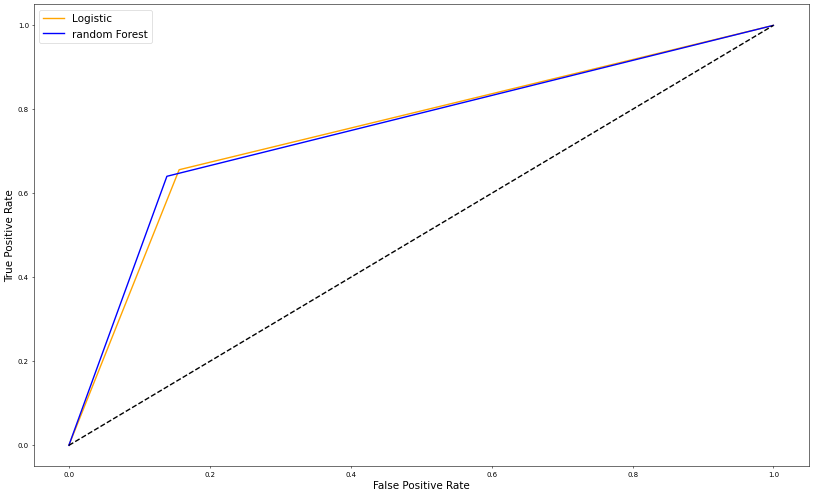

In [86]:
a=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
b=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
fig =plt.figure(figsize=(20,12),dpi=50)
fpr, tpr, thresholds = roc_curve(y_test,predictions )
plt.plot(fpr, tpr,color ='orange',label ='Logistic',linewidth=2 )
fpr, tpr, thresholds = roc_curve(y_test,predictions_rf )
plt.plot(fpr, tpr,color ='blue',label ='random Forest',linewidth=2 )

plt.plot(a,b,color='black',linestyle ='dashed',linewidth=2)
plt.legend(fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)

## **Let's submit our solutions**

In [87]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": randomForestFinalModel.predict( df_test[features])
})


In [88]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [89]:
submission.to_csv("titanic_s.csv",index=False)

<center><h1 style="color:green">Please Upvote!</h1></center>